<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Wiley Finance (2017)**

Dr. Yves J. Hilpisch | The Python Quants GmbH

http://tpq.io | [@dyjh](http://twitter.com/dyjh) | http://books.tpq.io

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Derivatives, Volatility and Variance

The first chapter provides some background information for the rest of the book. It mainly covers concepts and notions of importance for later chapters. In particular, it shows how the delta heding of options is connected with variance swaps and futures. It also discusses different notions of volatility and variance, the history of traded volatility and variance derivatives as well as why Python is a good choice for the analysis of such instruments.

## Option Pricing and Hedging

In the Black-Scholes-Merton (1973) benchmark model for option pricing, uncertainty with regard to the single underlying risk factor $S$ (stock price, index level, etc.) is driven by a *geometric Brownian motion* with stochastic differential equation (SDE)

$$
dS_t = \mu S_t dt + \sigma S_t dZ_t
$$

Throughout we may think of the risk factor as being a stock index paying no dividends. $S_t$ is then level of the index at time $t$, $\mu$ the constant drift, $\sigma$ the instantaneous volatility and $Z_t$ is a standard Brownian motion. In a risk-neutral setting, the drift $\mu$ is replaced by the (constant) risk-less short rate $r$

$$
dS_t = r S_t dt + \sigma S_t dZ_t
$$

In addition to the index which is assumed to be directly tradeable, there is also a risk-less bond $B$ available for trading. It satisfies the differential equation

$$
dB_t = r B_t dt
$$

In this model, it is possible to derive a closed pricing formula for a vanilla European call option $C$ maturing at some future date $T$ with payoff $\max[S_T - K,0]$, $K$ being the fixed strike price. It is

$$
C(S,K, t, T, r, \sigma)=S_{t} \cdot \mathbf{N}(d_{1})-e^{-r(T-t)} \cdot K \cdot \mathbf{N}(d_{2}) 
$$

where

\begin{eqnarray*}
\mathbf{N}(d)&=&\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{1}{2}x^{2}}dx \\
d_{1}&=&\frac{\log \frac{S_{t}}{K}+(r+\frac{\sigma^{2}}{2})(T-t)}{\sigma \sqrt{T-t}} \\
d_{2}&=&\frac{\log \frac{S_{t}}{K}+(r-\frac{\sigma^{2}}{2})(T-t)}{\sigma \sqrt{T-t}}
\end{eqnarray*}

The price of a vanilla European put option $P$ with payoff $\max[K - S_T,0]$ is determined by put-call-parity as

$$
P_{t}=C_{t}-S_{t}+e^{-r(T-t)}K
$$

There are multiple ways to derive this famous Black-Scholes-Merton formula. One way relies on the construction of a portfolio comprised of the index and the risk-less bond that perfectly *replicates the option payoff* at maturity. To avoid risk-less arbitrage, the value of the option must equal the payoff of the replicating portfolio. Another one relies on calculating the *risk-neutral expectation* of the option payoff at maturity and discounting it back to the present by the risk-neutral short rate. For detailed expositions of these approaches refer, for example, to Björk (2009). 

Yet another way, at which we want to have a look in a bit more detail, is to perfectly hedge the risk resulting from an option (e.g. from the point of view of a seller of the option) by dynamically trading the index and the risk-less bond. This approach is usually called _delta hedging_ (see Sinclair (2008), ch. 1). The delta of a European call option is given by the first partial derivative of the pricing formula with respect to the value of the risk factor, i.e. $\delta_t = \frac{\delta C_t}{\delta S_t}$. More specifically, we get

$$
\delta_t = \frac{\delta C_t}{\delta S_t} = \mathbf{N}(d_1)
$$

When trading takes place continuously, the European call option position hedged by $\delta_t$ index units short is risk-less

$$d\Pi_t \equiv dC_t - \delta_t S_t = 0$$

This is due to the fact that the only (instantaneous) risk results from changes in the index level and all such (marginal) changes are compensated for by the delta short index position.

Continuous models and trading are a mathematically convenient description of the real world. However, in practice trading and therefore hedging can only take place at discrete points in time. This does not lead to a complete breakdown of the delta hedging approach, but it introduces hedge errors. If hedging takes place every discrete time interval of length $\Delta t$, the Profit-Loss (PL) for such a time interval is roughly (see Bossu (2014), p.59)

$$
\textrm{PL}_{\Delta t} \approx \frac{1}{2} \Gamma \cdot \Delta S^2 + \Theta \cdot \Delta t
$$

$\Gamma$ is the *gamma* of the option and measures how the delta (marginally) changes with changing index level. $\Delta S$ is the change in the index level over the time interval $\Delta t$. It is given by

$$
\Gamma=\frac{\partial^{2} C}{\partial S^{2}}=\frac{\mathbf{N}'(d_{1})}{S\sigma\sqrt{T-t}}
$$

$\Theta$ is the *theta* of the option and measures how the option value changes with the passage of time. It is given approximately by (see Bossu (2014), p.60)

$$
\Theta \approx -\frac{1}{2}\Gamma S^2 \sigma^2
$$

With this we get


\begin{eqnarray*}
\textrm{PL}_{\Delta t} &\approx& \frac{1}{2} \Gamma \cdot \Delta S^2 -\frac{1}{2}\Gamma S^2 \sigma^2 \cdot \Delta t \\
&=& \frac{1}{2} \Gamma \cdot S^2 \left[ \left( \frac{\Delta S}{S} \right)^2 - \left( \sigma \cdot \sqrt{\Delta t} \right)^2 \right]
\end{eqnarray*}


The quantity $\frac{1}{2} \Gamma \cdot S^2$ is called the _dollar gamma_ of the option and gives the second order change in the option price induced by a (marginal) change in the index level. $\left( \frac{\Delta S}{S} \right)^2$ is the squared realized return over the time interval $\Delta t$ &mdash; it might be interpreted as the (instantaneously) realized variance if the time interval is short enough and the drift is close to zero. Finally, $\left( \sigma \cdot \sqrt{\Delta t} \right)^2$ is the fixed, "theoretical" variance in the model for the time interval.

The above reasoning illustrates that the PL of a discretely delta hedged option position is determined by the difference between the realized variance during the discrete hedge interval and the theoretically to be expected variance given the model parameter for the volatility. The total hedge error over $N = \frac{T}{\Delta t}$ intervals is given by

\begin{equation}
\textrm{Cumulative PL}_{\Delta t} \approx \frac{1}{2} \sum_{t=1}^{N}  \Gamma_{t-1} \cdot S_{t-1}^2 \left[ \left( \frac{\Delta S_t}{S_{t-1}} \right)^2 - \left( \sigma \cdot \sqrt{\Delta t} \right)^2 \right] \label{delta_intro}
\end{equation}

This little exercise in option hedging leads us to a result which is already quite close to a product intensively discussed in this book: listed variance futures. _Variance futures_, and their Over-the-Counter (OTC) relatives _variance swaps_, pay to its holder the difference between realized variance over a certain period of time and a fixed variance strike.

## Notions of Volatility and Variance

The previous section already touches on different notions of volatility and variance. This section provides formal definitions for these and other quantities of importance. For a more detailed exposition refer to Sinclair (2008). In what follows we assume that a time series is given with quotes $S_{n},n\in\{0,...,N\}$ (see Hilpisch (2015, ch. 3)). We do not assume any specific model that might generate the time series data. The log return for $n>0$ is defined by 

$$
R_{n}\equiv \log S_{n}-\log S_{n-1} = \log \frac{S_{n}}{S_{n-1}}
$$

* **realized or historical volatility**: this refers to the standard deviation of the log returns of a financial time series; suppose we observe $N$ (past) log returns $R_{n},n\in\{1,...,N\},$ with mean return $\hat{\mu}=\frac{1}{N}\sum_{n=1}^{N}R_{n}$; the realized or historical volatility $\hat{\sigma}$ is then given by
$$
\hat{\sigma}=\sqrt{\frac{1}{N-1}\sum_{n=1}^{N}(R_{n}-\hat{\mu})^{2}}
$$

* **instantaneous volatility**: this refers to the volatility factor of a diffusion process; for example, in the Black-Scholes-Merton model the instantaneous volatility $\sigma$ is found in the respective (risk-neutral) stochastic differential equation (SDE)
$$
dS_{t}=rS_{t}dt+\sigma S_{t} dZ_{t}
$$

* **implied volatility**: this is the volatility that, if put into the Black-Scholes-Merton option pricing formula, gives the market-observed price of an option; suppose we observe today a price of $C^{*}_{0}$ for a European call option; the implied volatility $\sigma^{imp}$ is the quantity that solves ceteris paribus the implicit equation
$$
C^{*}_{0}=C^{BSM}(S_{0},K,t=0, T,r,\sigma^{imp})
$$

These volatilities all have squared counterparts which are then named *variance*, like realized variance, instantenous variance or implied variance. We have already encountered realized variance in the previous section. Let us revisit this quantity for a moment. Simply applying the above definition of realized volatility and squaring it we get

$$
\hat{\sigma}^2=\frac{1}{N-1}\sum_{n=1}^{N}(R_{n}-\hat{\mu})^{2}
$$

In practice, however, this definition usually gets adjusted to

$$
\hat{\sigma}^2=\frac{1}{N}\sum_{n=1}^{N}R_{n}^{2}
$$
The drift of the process is assumed to be zero and only the log return terms get squared. It is also common practice to use the definition for the uncorrected (biased) standard deviation with factor $\frac{1}{N}$ instead of the definition for the corrected (unbiased) standard deviation with factor $\frac{1}{N-1}$. This explains why we call the term $\left( \frac{\Delta S_t}{S_{t-1}} \right)^2$ from the delta hedge PL in the previous section _realized variance over the time interval_ $\Delta t$. In that case, however, the return is the simple return instead of the log return.

Other adjustments in practice are to scale the value to an annual quantity by multiplying it by 252 (trading days) and to introduce an additional scaling term (to get percent values instead of decimal ones). One then usually ends up with

$$
\hat{\sigma}^2 \equiv 10000 \cdot \frac{252}{N} \cdot \sum^{N}_{n=1}R_n^2
$$

Later on we will also drop the hat notation when there is no ambiguity.

## Listed Volatility and Variance Derivatives

Volatility is one of the most important notions and concepts in derivatives pricing and analytics. Early reasearch and financial practice considered volatility as a major input for pricing and hedging. It is not that long ago that the market started thinking of volatility as an *asset class* of its own and designed products to make it directly tradeable.

The idea for a volatility index was conceived by Brenner and Galai in 1987 and published in the note Brenner and Galai (1989) in the Financial Analysts Journal. They write in their note:

> While there are efficient tools for hedging against general changes in overall market directions, so far there are no effective tools available for hedging against changes in volatility. ... We therefore propose the construction of three volatility indexes on which cash-settled options and futures can be traded.

In what follows, we focus on the US and European markets.

### The US History

The Chicago Board Options Exchange (CBOE) introduced an equity volatility index, called VIX, in 1993. It was based on a methodology developed by Fleming, Ostdiek and Whaley (1995) &mdash; a working paper version of which was circulated in 1993 &mdash; and data from S&P 100 index options. The methodology was changed in 2003 to the now standard practice which uses the robust, model free replication results for variance and data from S&P 500 index options (see CBOE (2003)). While the first version represented a proxy for the 30 day at-the-money implied volatility, the current version is a proxy for the 30 day variance swap rate, i.e. the fixed variance strike which gives a zero value for a respective swap at inception.

Carr and Lee (2009) provide a brief history of both OTC and listed volatility and variance products. They claim that the first OTC variance swap has been engineered and offered by Union Bank of Switzerland (UBS) in 1993, at about the same time the CBOE announced the VIX. These were also the first traded contracts to attract some liquidity in contrast to volatility swaps which also have been introduced shortly afterwards. One reason for this is that variance swaps can be robustly hedged &mdash; as we will see in later chapters &mdash; while volatility swaps cannot in general. It is more or less the same reasoning behind the change of methodology for the VIX in 2003.

Trading in _futures on the VIX_ started in 2004 while the first _options_ on the index were introduced in 2006. These instruments are already described in Whaley (1993), although their market launch took more than 10 years after the introduction of the VIX. These were not the first listed volatility derivatives but the first to attract significant liquidity and they are more actively traded at the time of this writing than ever. Those listed instruments introduced earlier, like volatility futures launched in 1998 by Deutsche Terminbörse (now Eurex), could not attract enough liquidity and are now only a footnote in the financial history books.

The volume of traded contracts on the VIX has risen sharply on average over the recent years as the following figure illustrates (source: http://cfe.cboe.com/data/historicaldata.aspx). The volume varies rather erratically and is influenced among others by seasonal effects and the general market environment (bullish or bearish sentiment).

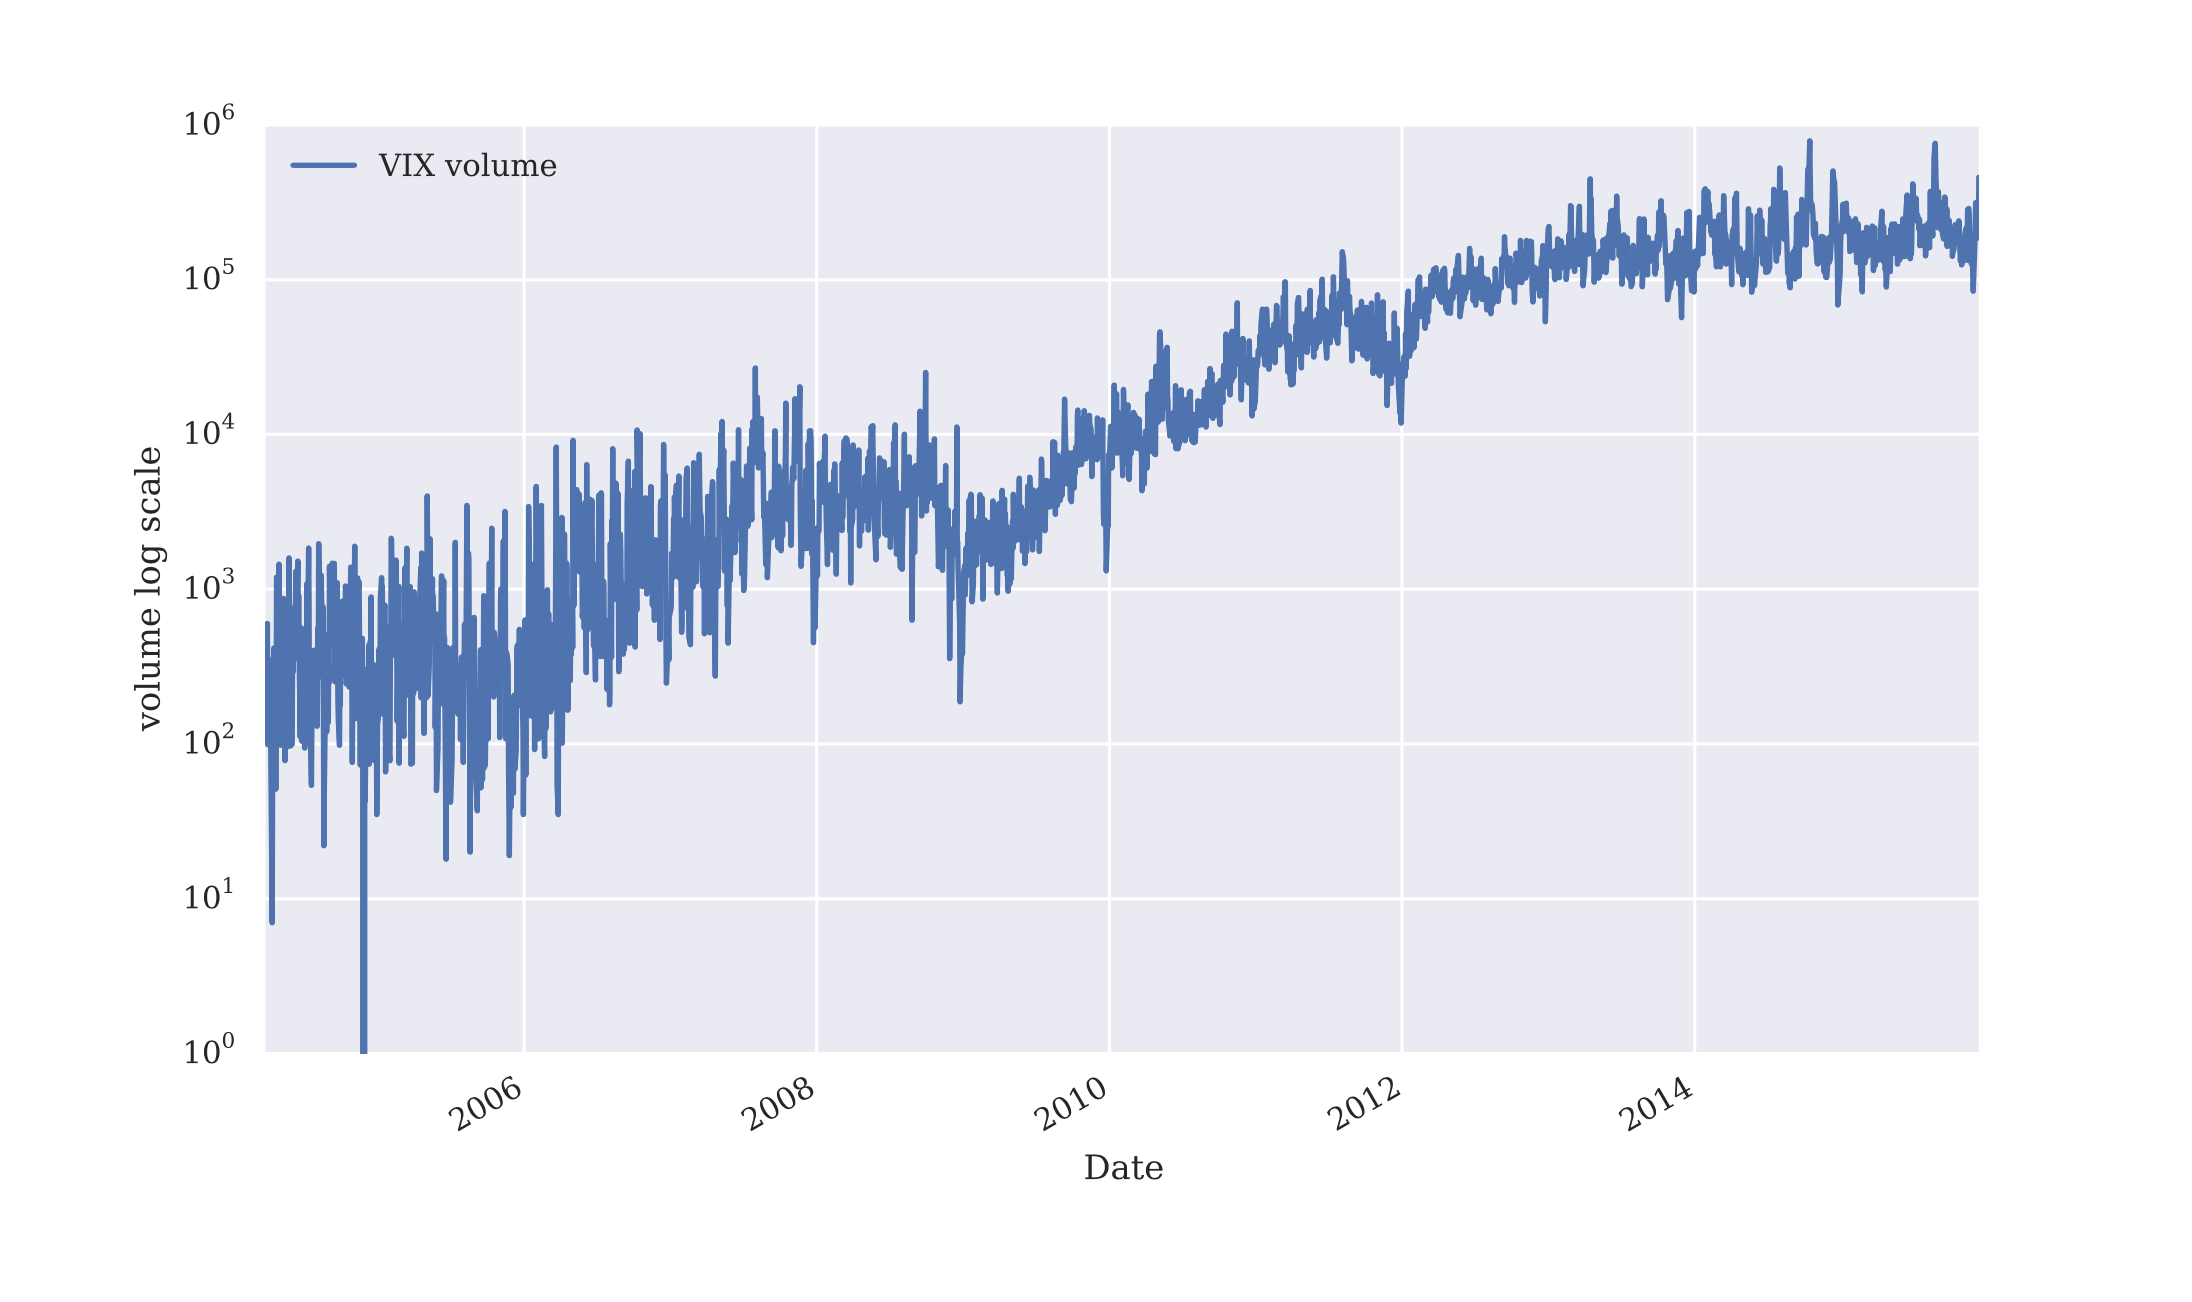
<p style="text-align: center; font-family: monospace;">Historical volume of traded VIX derivatives on a log scale.</p>

![vix_volume.png](https://hilpisch.com/lvvd/vix_volume.png)
<p style="text-align: center; font-family: monospace;">Historical volume of traded VIX derivatives on a log scale (updated).</p>

In December 2012, the CBOE launched the _S&P 500 variance futures contract_ &mdash; almost 20 years after their OTC counterparts started trading. After some early successes in building liquidity in 2013, liquidity has dried out almost completely in 2014 and 2015. 

### The European History

Eurex &mdash; back then Deutsche Terminbörse &mdash; introduced in 1994 the _VDAX volatility index_, an index representing the 45 day implied volatility of DAX index options. As mentioned before, Eurex introduced already in 1998 futures on the VDAX which could, however, not attract enough liquidity and were later delisted. In 2005, the methodolgy for calculating the index was also changed to the more robust, model free replication approach for variance swaps. The index was renamed VDAX-NEW and a new futures contract on this index was introduced.

In 2005, Eurex also launched _futures on the VSTOXX volatility index_ which is based on options on the EURO STOXX 50 index and uses the by now standard methodology for volatility index calculation as laid out in CBOE (2003). They were in 2009 re-launched as "Mini VSTOXX Futures" with symbol FVS. At the same time, Eurex stopped the trading of other volatility futures, like those on the VDAX-NEW and the VSMI.

Since the launch of the new VSTOXX futures, they have attracted significant liquidity and are now actively traded. A major reason for this can be seen in the fincial crisis of the years 2007 to 2009 when volatility indexes saw their highest levels ever. This is illustrated in the following figure where the maximum values for the VIX and VSTOXX are observed towards the end of 2008.  This led to a higher sensitivity of market participants for the risks that spikes in volatility can bring along and therewith increased the demand for products to hedge against such adverse market environments. Observe also that the two indexes are positively correlated in general, over the period shown with about +0.55.

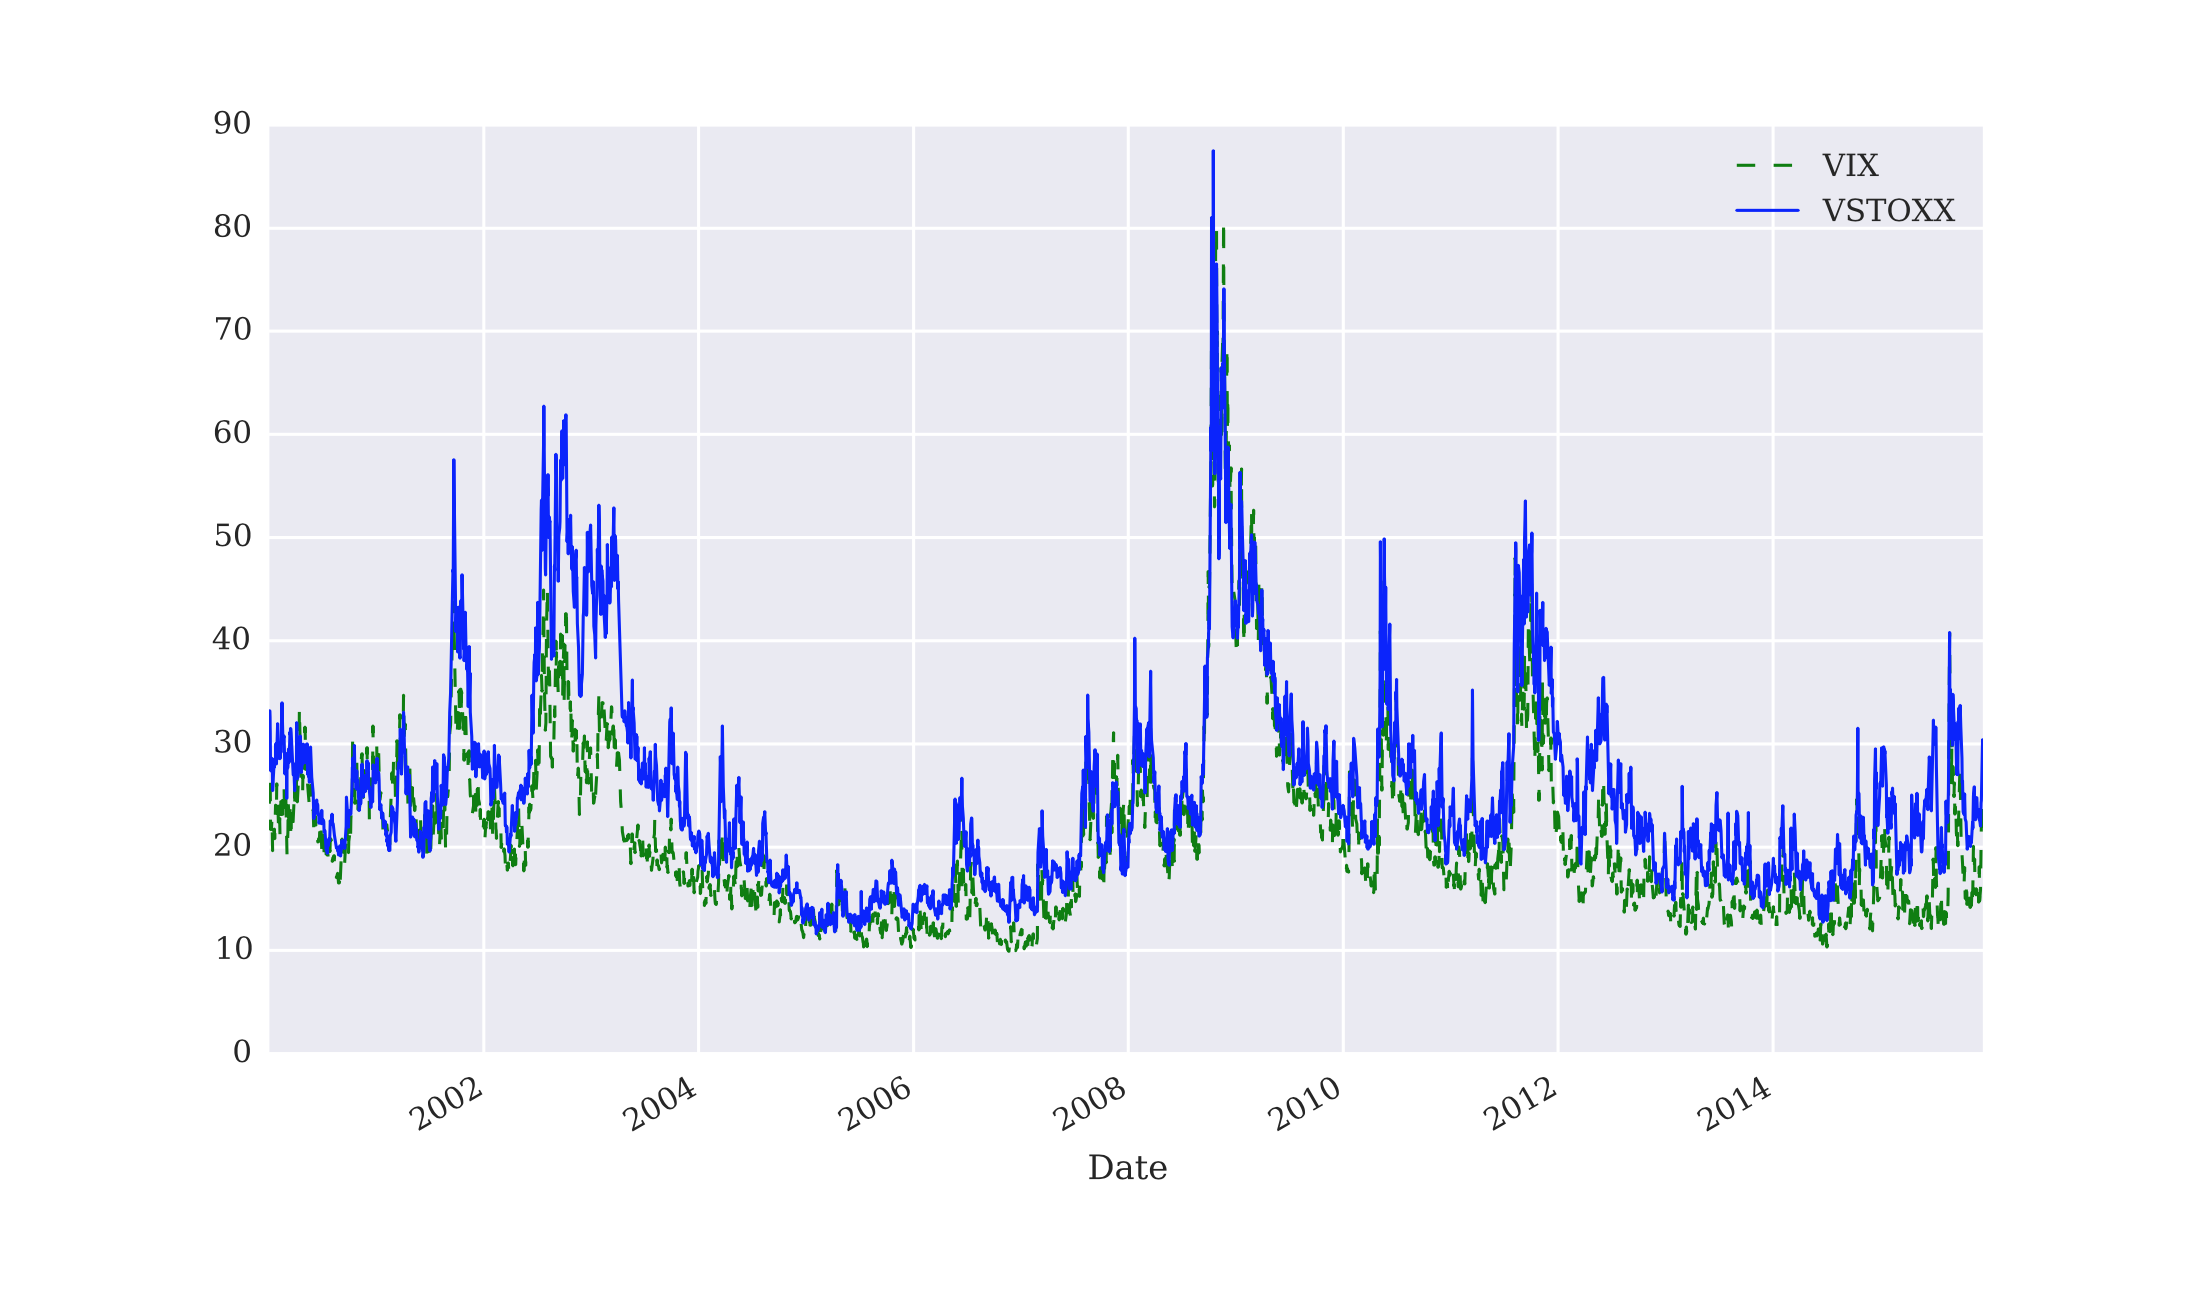
   
<p style="text-align: center; font-family: monospace;">Historical daily closing levels for the VIX and the VSTOXX volatility indexes.</p>

![vola_history.png](https://hilpisch.com/lvvd/vola_history.png)
   
<p style="text-align: center; font-family: monospace;">Historical daily closing levels for the VIX and the VSTOXX volatility indexes (updated).</p>

In March 2010, Eurex introduced *options on the VSTOXX index*. These instruments also attracted some liquidity and are at the time of this writing actively traded. In September 2014, Eurex then also launched a _variance futures contracts_ on the EURO STOXX 50 index.

### Volatility of Volatility Indexes

Nowadays, we are already one step further. There are now indexes available that measure the _volatility of volatility (vol-vol)_. The so-called VVIX of the CBOE was introduced in March 2012. The index provider STOXX Limited introduced in October 2015 the V-VSTOXX indexes which are described on http://www.stoxx.com as follows:

> The V-VSTOXX Indices are based on VSTOXX realtime options prices and are designed to reflect the market expectations of near-term up to long-term volatility-of-volatility by measuring the square root of the implied variance across all options of a given time to expiration.

These new indexes and potential products written on them seem to be a beneficial addition to the volatility asset class. Such products might be used, for example, to hedge options written on the volatility index itself since the vol-vol is stochastic in nature rather than constant or deterministic.

The VVIX index is generally on a much higher level than the VIX index as the following figure illustrates (source: Refinitiv Eikon). This indicates a much higher volatility for the VIX index itself compared to the S&P 500 volatility.

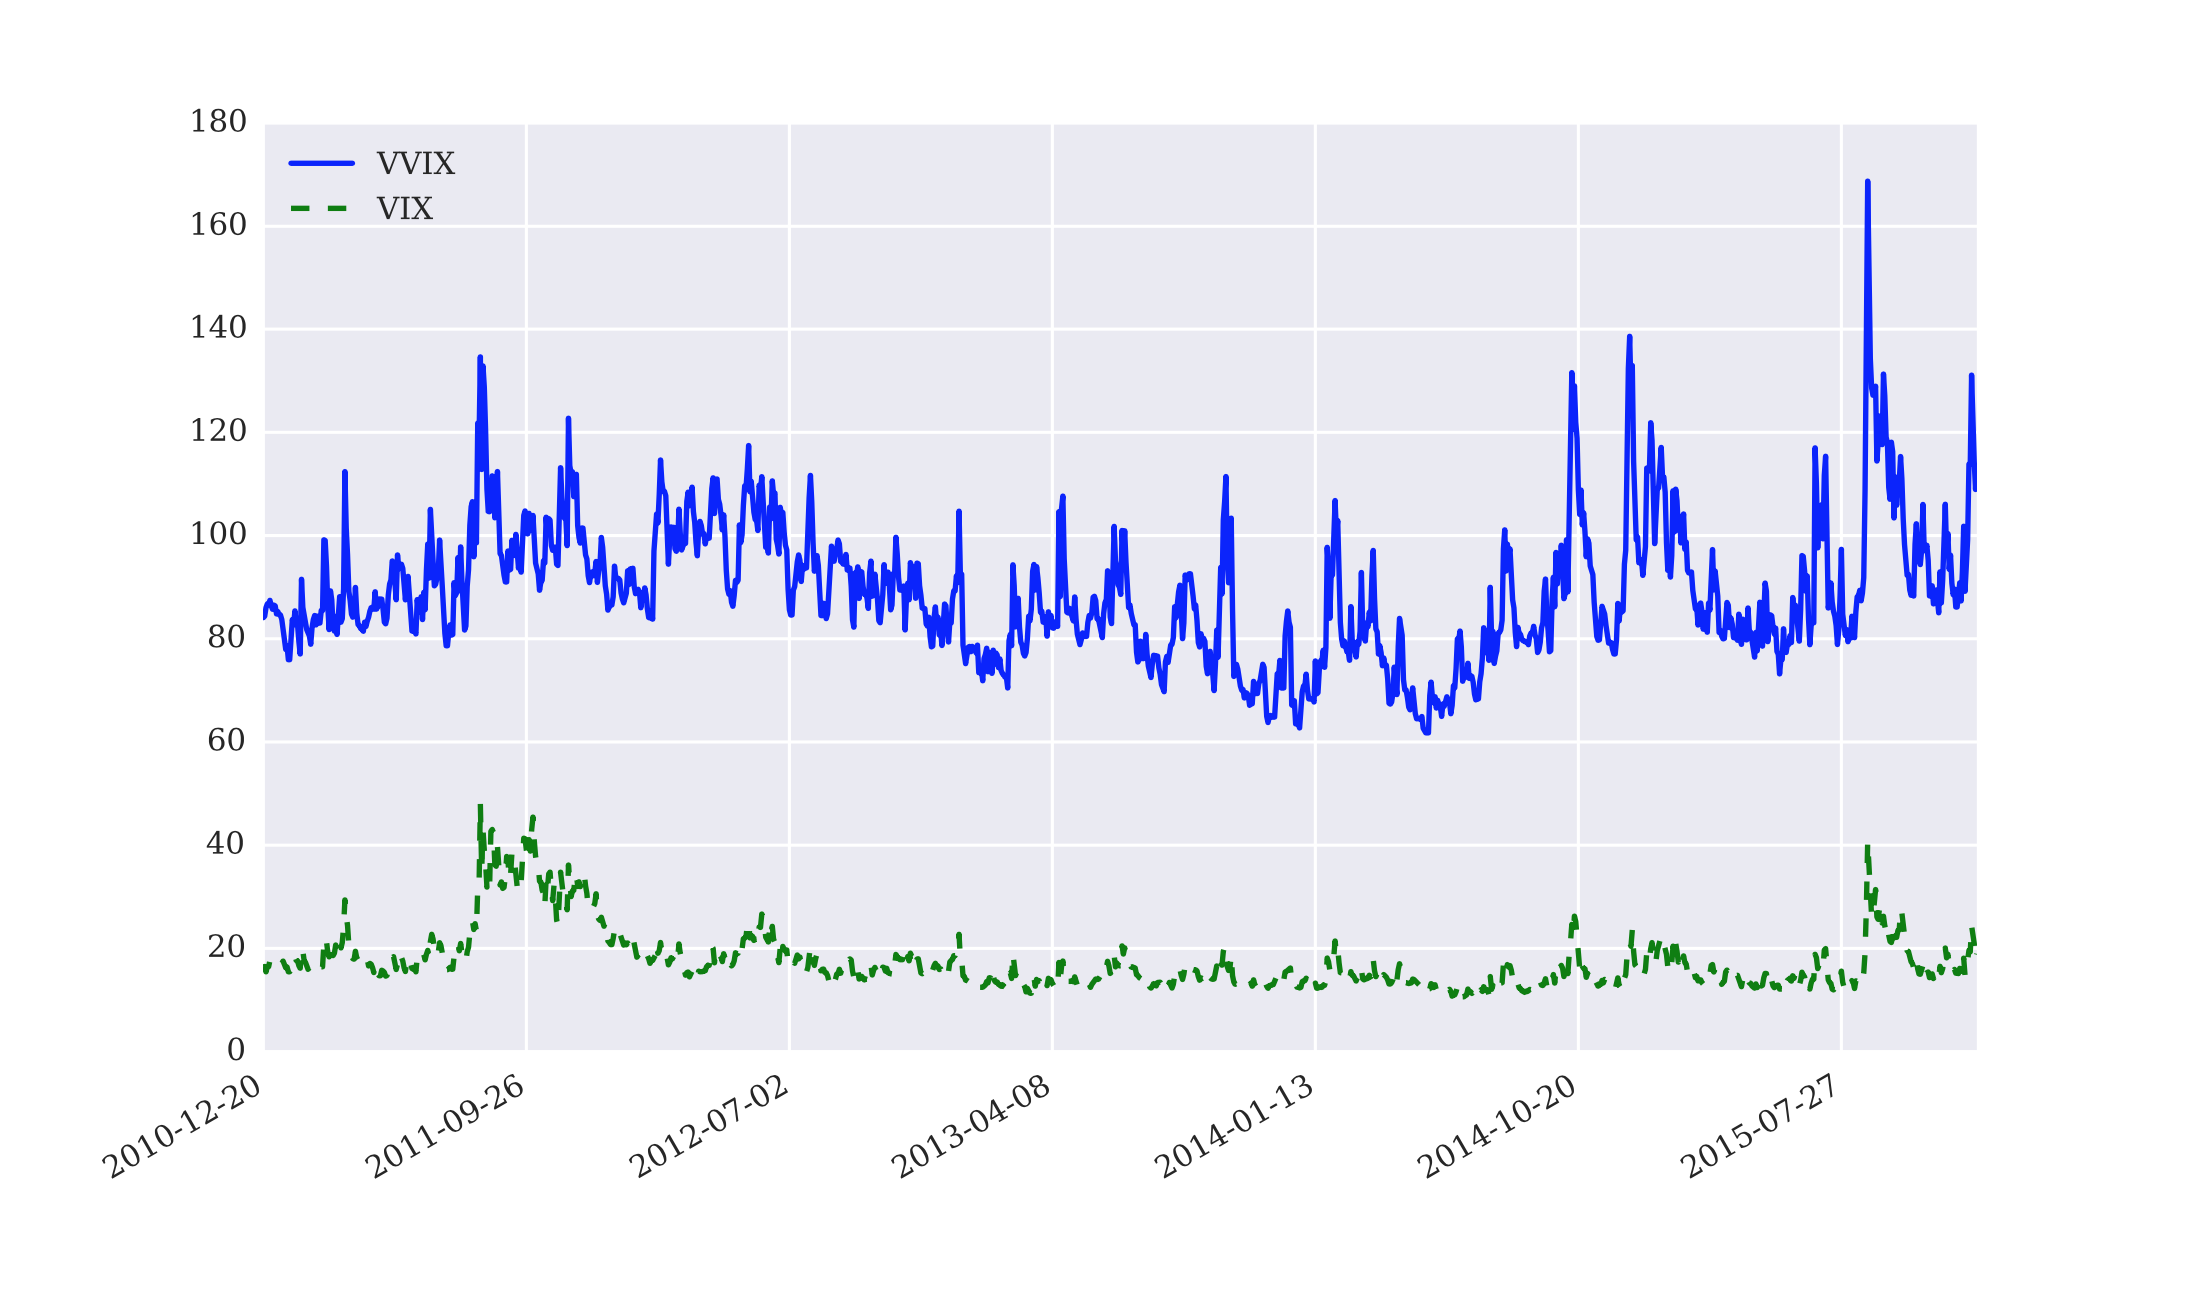

<p style="text-align: center; font-family: monospace;">Historical daily closing levels for the VIX and the VVIX volatility (of volatility) indexes.</p>

![vix_vvix_1.png](https://hilpisch.com/lvvd/vix_vvix_1.png)

<p style="text-align: center; font-family: monospace;">Historical daily closing levels for the VIX and the VVIX volatility (of volatility) indexes (updated).</p>

Over the period shown, the VVIX is highly positively correlated with the VIX at a level of about +0.66. The following figure plots the time series data for the two indexes on two different scales to show this stylized fact graphically.

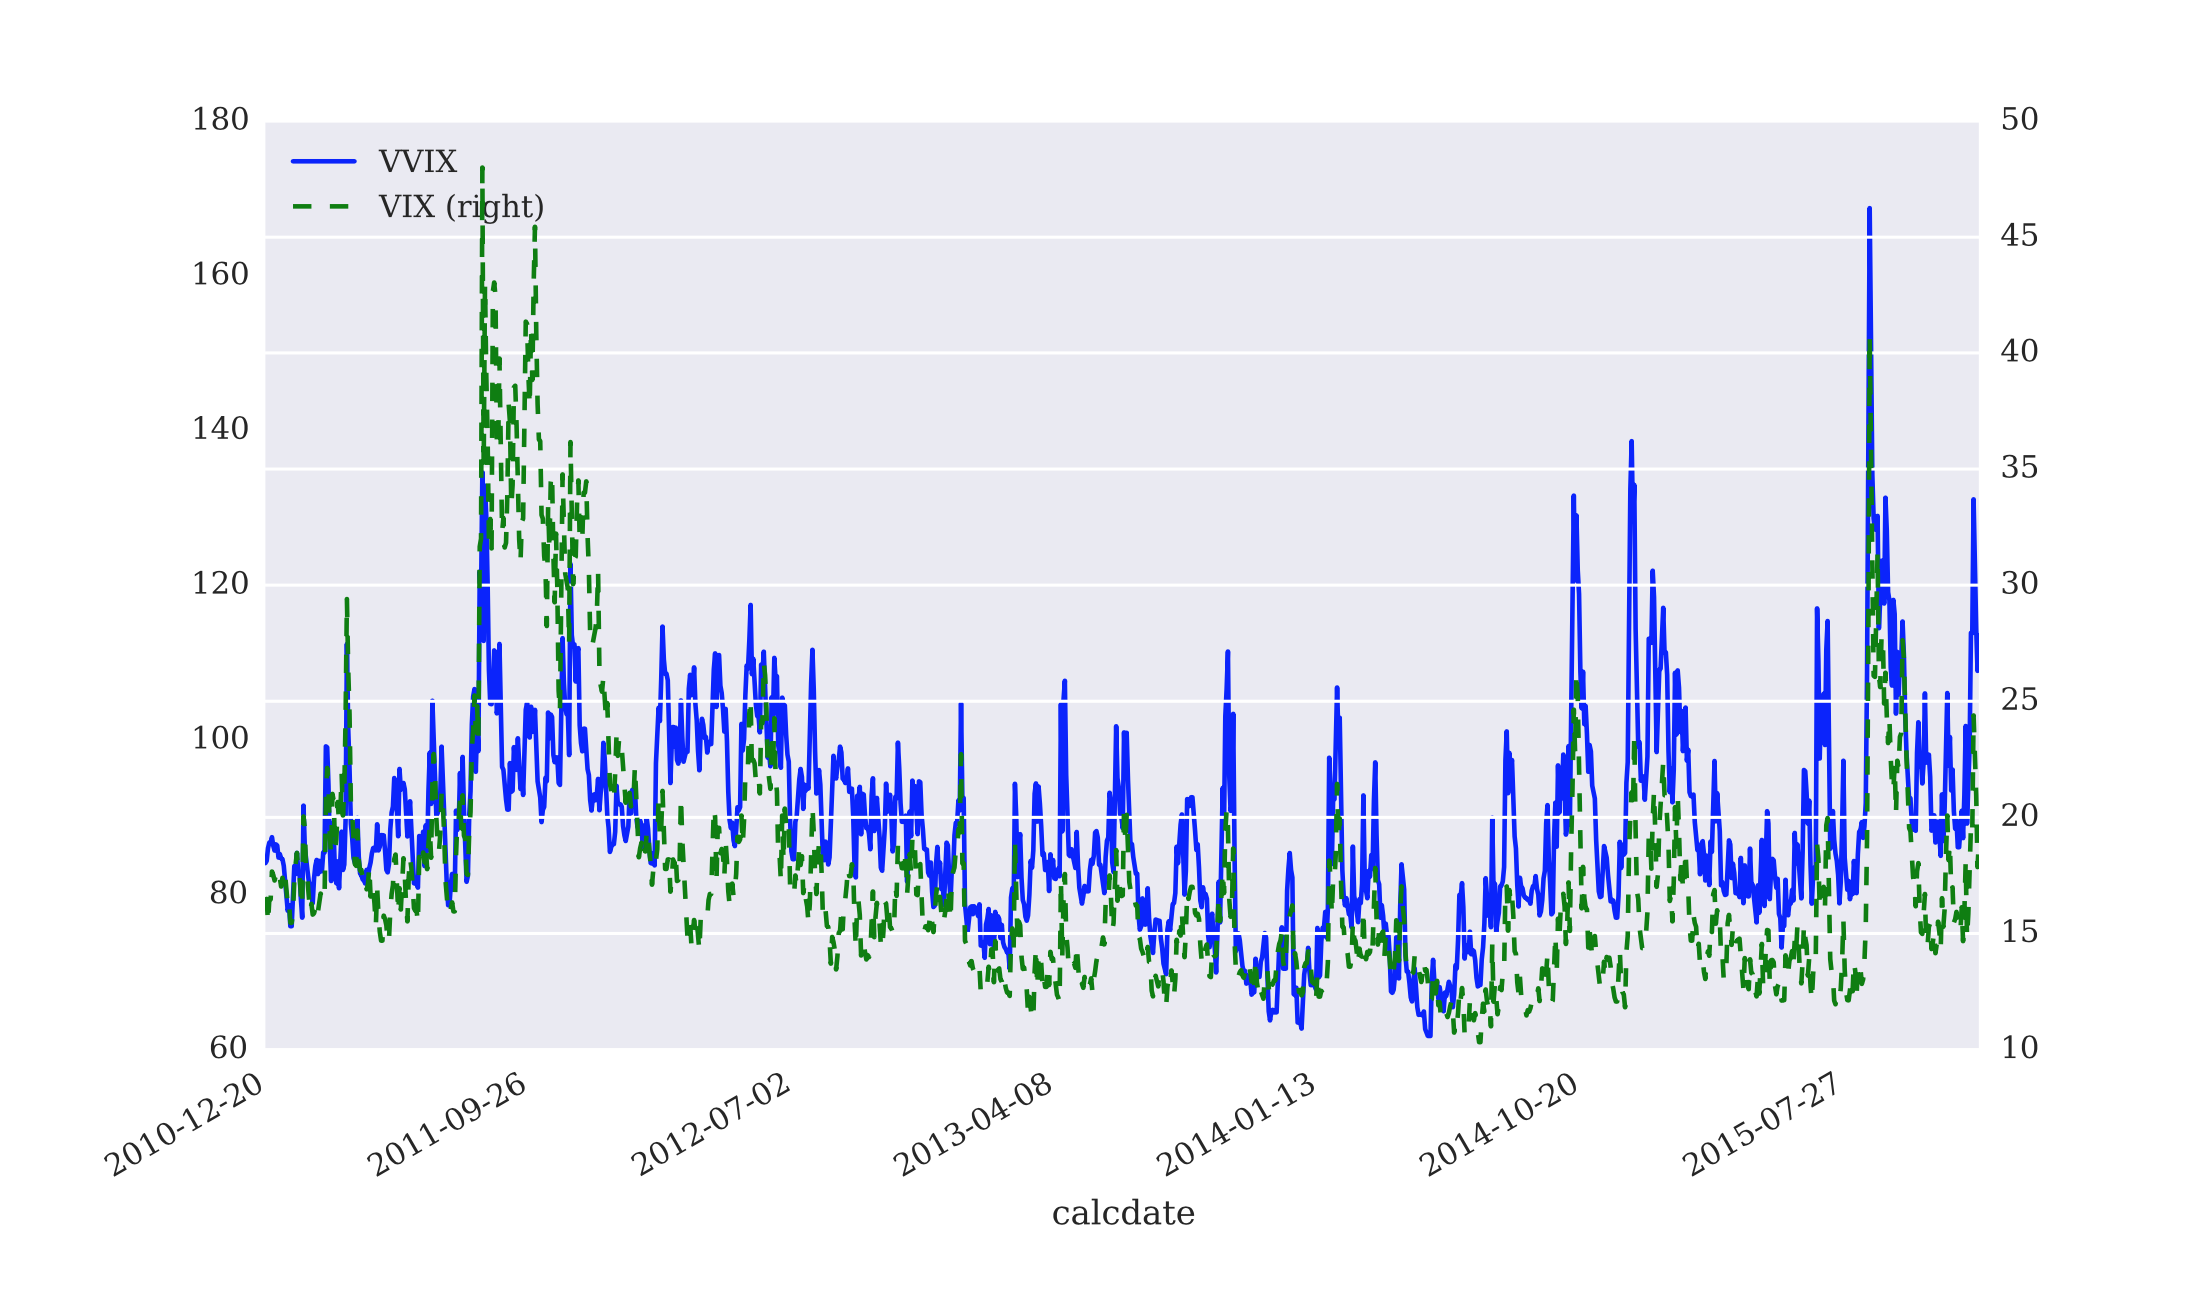
   
<p style="text-align: center; font-family: monospace;">Different scalings for the VVIX and VIX indexes to illustrate the positive correlation.</p>

![vix_vvix_2.png](https://hilpisch.com/lvvd/vix_vvix_2.png)
   
<p style="text-align: center; font-family: monospace;">Different scalings for the VVIX and VIX indexes to illustrate the positive correlation (updated).</p>

### Products Covered in this Book

There is quite a diverse spectrum of volatility and variance futures available. Out of all possible products, the focus of this book lies on the European market and these instruments:

* VSTOXX as a volatility index
* VSTOXX futures
* VSTOXX options
* Eurex Variance Futures

The majority of the material has originally been developed as part of the Eurex Advanced Services (see http://eurexchange.com/advanced-services). Althought the focus is on Europe, the methods and approaches presented usually can be tranferred easily to the American landscape, for instance. This results from the fact that some methodogical unification has taken place over the past few years with regard to volatility and variance related indexes and products.

## Volatility and Variance Trading

This section discusses motives and rationales for trading listed volatility and variance derivatives. It does not cover volatility (variance) trading strategies that can be implemented with, for example, regular equity options (see Cohen (2005), ch. 4).

### Volatility Trading

It is instructive to first list characteristics of volatility indexes. We focus on the VSTOXX and distingish between *facts* (which follow from construction) and *stylized facts* (which are supported by empirical evidence).

* **market expectation** (fact): the VSTOXX represents a 30 day implied volatility average from out-of-the money options, i.e. the market consensus with regard to the "to be realized" volatility over the next 30 days
* **non-tradeable asset** (fact): the VSTOXX itself is not directly tradeable, only derivatives on the VSTOXX can be traded
* **mean-reverting nature** (fact): the VSTOXX index is mean-reverting, it does not show a positive or negative drift over longer periods of time
* **negative correlation** (stylized fact): the VSTOXX is (on average) negatively correlated with the respective equity index, the EURO STOXX 50
* **positive jumps** (stylized fact): during times of stock market crises, the VSTOXX can jump to rather high levels; the mean reversion generally happens much more slowly
* **higher than realized volatility** (stylized fact): on average, the VSTOXX index is higher than the realized volatility over the next 30 days

The following figure illustrates the negative correlation between the S&P 500 index and the VIX index graphically (data source: Yahoo! Finance). Over the period shown, the correlation is about -0.75.

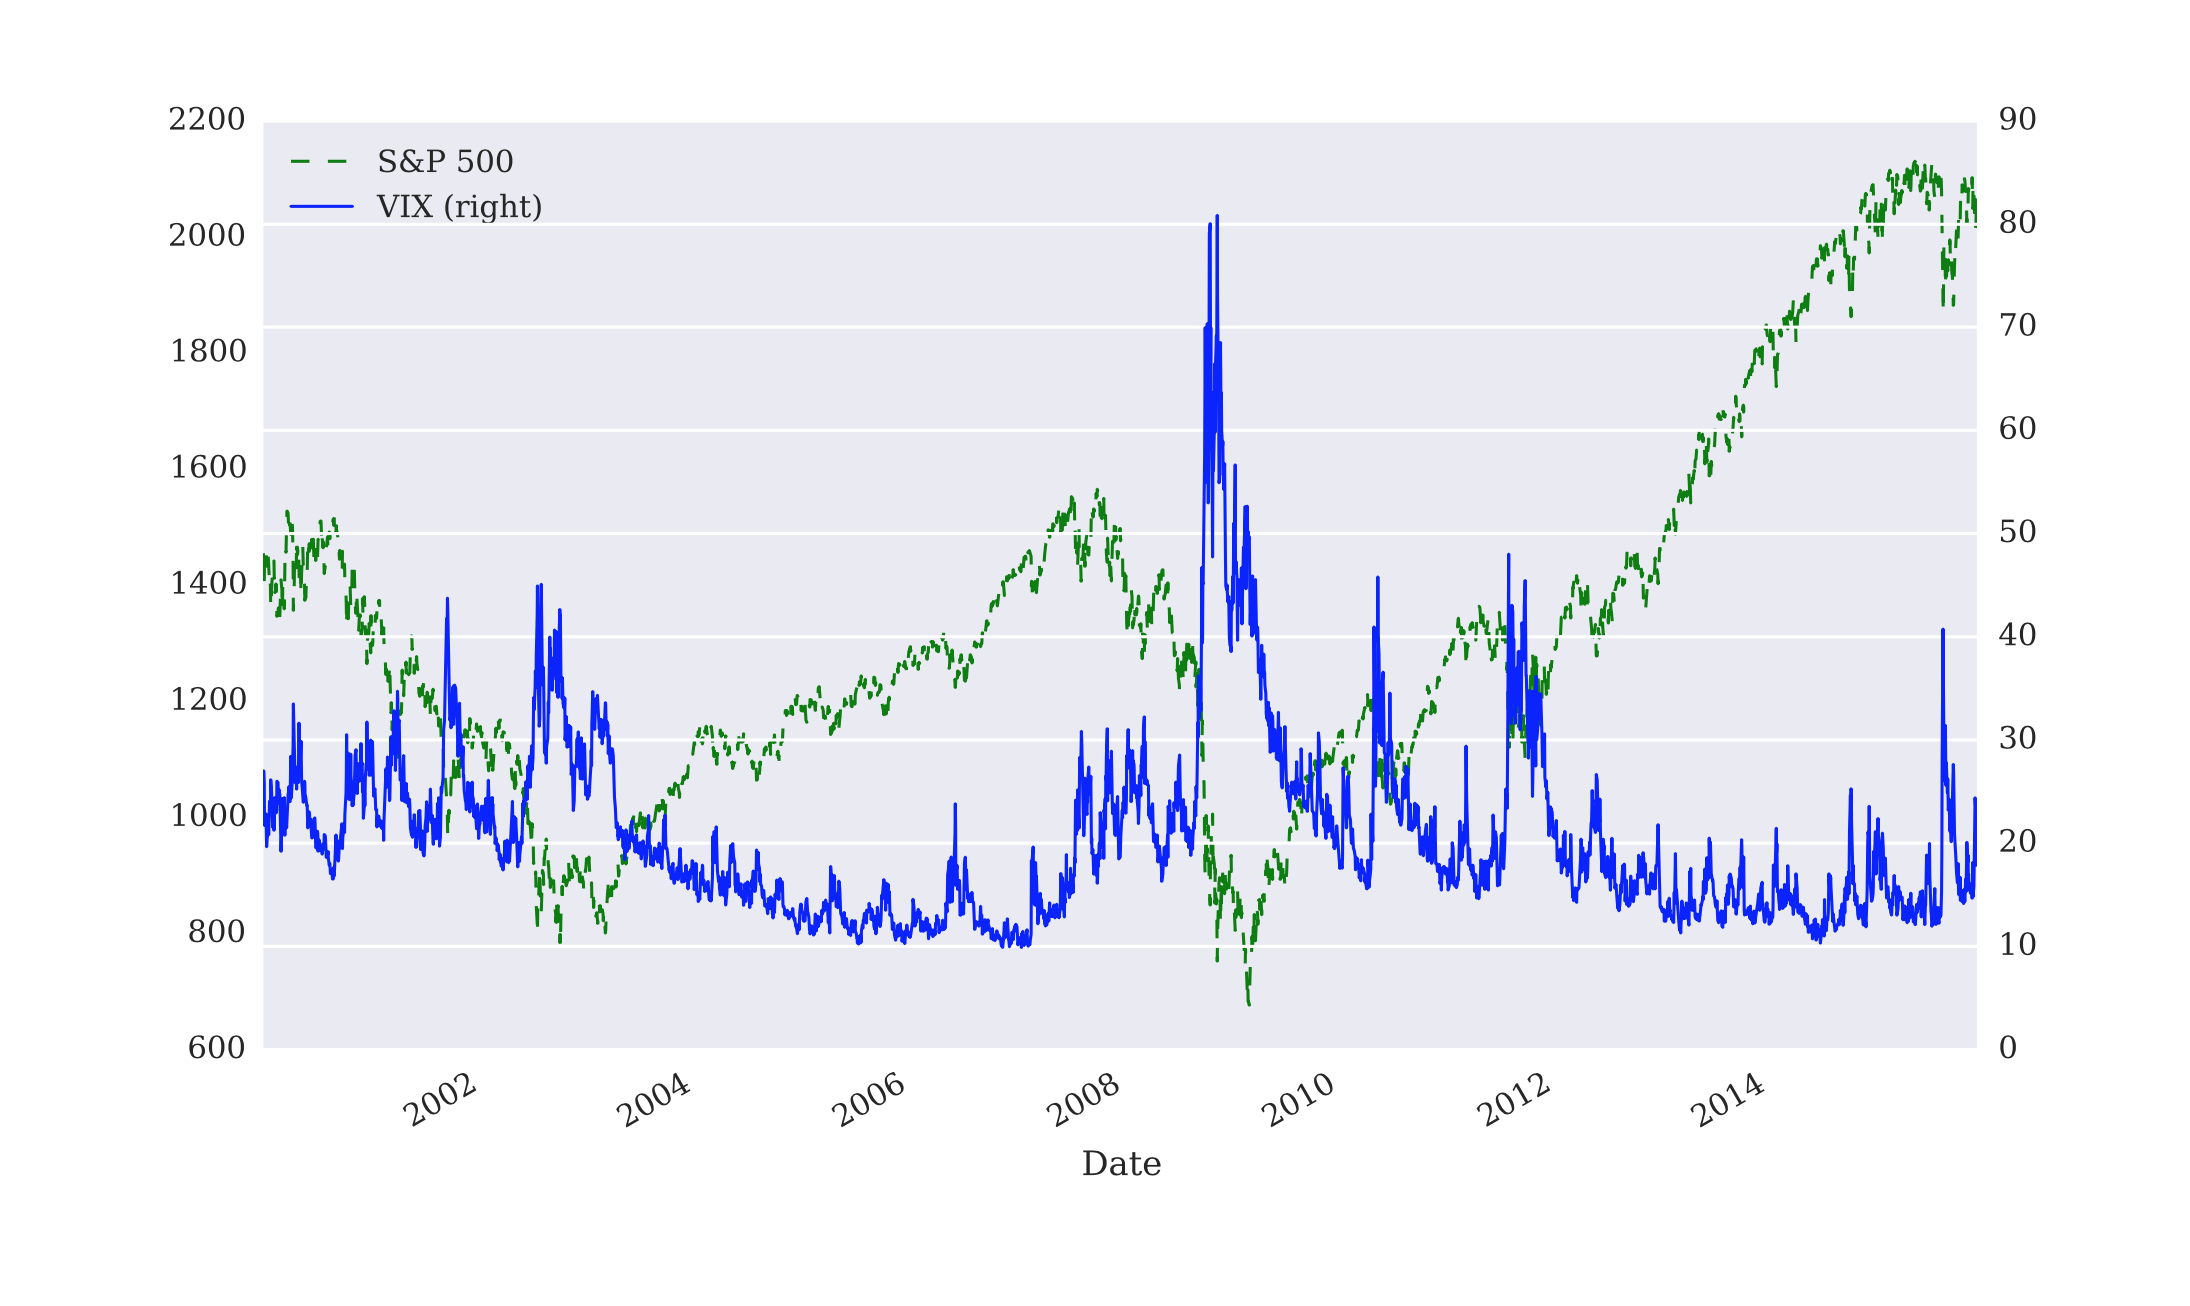
   
<p style="text-align: center; font-family: monospace;">Different scalings for the S&P 500 and VIX indexes to illustrate the negative correlation.</p>

![sp500_vix.png](https://hilpisch.com/lvvd/sp500_vix.png)
   
<p style="text-align: center; font-family: monospace;">Different scalings for the S&P 500 and VIX indexes to illustrate the negative correlation (updated).</p>

The value of a VSTOXX future represents the (market) expectation with regard to the future value of the VSTOXX at the maturity date of the future. Given this background, typical volatility trading strategies involving futures include the following:

* **long VSTOXX future**: such a position can be used to hedge equity positions (due to the negative correlation with the EURO STOXX 50) or to increase returns of an equity portfolio (e.g. through a constant-proportion investment strategy); it can also be used to hedge a short realized volatility strategy
* **short VSTOXX future**: such a trade can be entered, for example, when the VSTOXX spikes and the  expectation is that it will (fast enough) revert to its mean; it might also serve to reduce vega exposure in long vega option portfolios
* **term structure arbitrage**: for example, shorting the front month futures contract and going long the nearby futures contract represents a typical term structure arbitrage strategy when the term structure is in contango; this is due to different carries associated with different futures contracts and maturities, respectively
* **relative value arbitrage**: VSTOXX futures can also be traded against other volatility/variance sensitive instruments and positions, like OTC variance swaps, equity options portfolios, etc. 

Similar and other strategies can be implemented involving VSTOXX options. With regard to exercise they are European by nature and can be delta hedged by using VSTOXX futures which is yet another motive for trading in futures. Typical trading strategies involving VSTOXX options involve:

* **long OTM calls**: such a position might protect an equity portfolio from losses due to a market crash (again due to the negative corrleation between VSTOXX and EURO STOXX 50)
* **short ATM calls**: writing ATM calls, and pocketing the option premium, might be attractive when the current implied volatility levels are relatively high
* **long ATM straddle**: buying put and call options on the VSTOXX with same (ATM) strike and maturity yields a profit when the VSTOXX moves fast enough in one direction; this is typically to be expected when the volatility of volatility (vol-vol) is high

For both VSTOXX futures and options many other strategies can be implemented that exploit some special situation (e.g. contango or backwardation in the futures prices) or reflect a certain expectation of the trader (e.g. that realized volatility will be lower/higher than the implied/expected volatility). 

### Variance Trading

The motives and rationales for trading in EURO STOXX 50 variance futures are not too different from those involving VSTOXX derivatives (see Bossu et al. (2005)). Typical strategies include:

* **long variance future**: this position benefits when the realized variance is higher than the variance strike (implied variance at inception); it might also be used to hedge equity portfolio risks or short vega options positions
* **short variance future**: this position benefits when the realized variance is below the variance strike which tends to be the case on average; it can also hedge a long vega options position
* **forward volatility/variance trading**: since variance is additive over time (which volatility is not), one can get a perfect exposure to forward implied volatility by, for example shorting the September variance future and going long the October contract; this gives an exposure to the forward implied volatility from September maturity to October maturity
* **correlation trading**: variance futures can be traded to exploit (statistical) arbitrage opportunities between, for example, the (implied) variance of an equity index and its components or the (implied) variance of one equity index versus another one; in both cases, the rationale is generally based on the correlation of the different assets and their variance, respectively

## Python as Our Tool of Choice

There are some general reasons why Python is a good choice for computational finance and financial data science these days. Among others, these are:

* **open source**: Python is open source and can be used by students and big financial institutions alike for free
* **syntax**: Python's readable and concise syntax make it a good choice for presenting formal concepts, like those in finance
* **ecosystem**: compared to other languages Python has an excellent ecosystem of libraries and packages that are useful for data analytics and scientific computing in general and financial analytics in particular
* **performance**: in recent years, the ecosystem of Python has grown especially in the area of performance libraries, making it much easier to get to computing speeds more than sufficient also for the most computationally demanding algorithms, like Monte Carlo simulation
* **adoption**: at the time of this writing, Python has established itself as a core technology at major financial institutions, be it leading investment banks, big hedge funds or more traditional asset management firms
* **career**: given the wide-spread adoption of Python, learning and mastering the language seems like a good career move for everybody working in the industry or planning to do so

In view of the scope and style of the book, one special feature is noteworthy:

* **interactivity**: the majority of the code examples presented in this book can be executed in interactive fashion within the Jupyter Notebook environment (see http://jupyter.org); in this regard, Python has a major advantage as an interpreted language compared to a compiled one with its typical edit-compile-run cycle

Chapter 1 of Hilpisch (2018) provides a more detailed overview of aspects related to Python for Finance. All the code presented in this book is available via resources listed under http://lvvd.tpq.io, especially on the Quant Platform for which you can register under http://lvvd.quant-platform.com.

## Quick Guide Through Rest of the Book

The remainder of this *introductory part* of the book is organized as follows.

* **chapter 2**: this chapter introduces Python as a technology platform for (interactive) financial analytics; a more detailed account of Python for Finance is provided in Hilpisch (2014)
* **chapter 3**: this chapter presents the model-free replication approach for variance; it is important for both volatility indexes and derivatives written on them as well as for variance futures

The second part of the book is about the _VSTOXX and listed volatility derivatives_. It comprises the following chapters.

* **chapter 4**: as a starting point, chapter 4 uses Python to analyze historical data for the VSTOXX and EURO STOXX 50 indexes; a focal point is the analysis of some simple trading strategies involving the VSTOXX
* **chapter 5**: using the model-free replication approach for variance, this chapter shows in detail how the VSTOXX index is calculated and how to use Python to (re-)calculate it using raw option data as input
* **chapter 6**: Gruenbichler and Longstaff (1996) were among the first to propose a parameterized model to value futures and options on volatility indexes; chapter 6 presents their model which is based on a square-root diffusion process and shows how to simulate and calibrate it to volatility option market quotes
* **chapter 7**: building on chapter 6, chapter 7 presents a more sophisticated framework &mdash; a deterministic shift square-root jump diffusion (SRJD) process &mdash; to model the VSTOXX index and to better capture the implied volatility smiles and volatility term structure observed in the market; the exposition is a bit more formal compared to the rest of the book
* **chapter 8**: this brief chapter discusses terms of the VSTOXX volatility index as well as the futures and options traded on the VSTOXX

Part three of the book is about the _Eurex Variance Futures contract_ as listed in September 2014. That part comprises three chapters.

* **chapter 9**: listed variance futures are mainly based on the popular OTC variance swap contracts with some differences introduced by intraday trading; chapter 9 therefore covers variance swaps in some detail and also discusses differences between variance and volatility as an underlying asset
* **chapter 10**: this chapter provides a detailed discussion of all concepts related to the listed Eurex Variance Futures contract and shows how to (re-)calculate its value given historical data; it also features a comparison between the futures contract and a respective OTC variance swap contract
* **chapter 11**: this chapter discusses all those special characteristics of the Eurex Variance Futures when it comes to (intraday) trading and settlement 

Part four of the book focuses on the *DX Analytics* financial library (see http://dx-analytics.com) to model the VSTOXX index and to calibrate different models to VSTOXX options quotes. It consists of three chapters:

* **chapter 12**: this chapter introduces basic concepts and API elements of the DX Analytics library
* **chapter 13**: using the square-root diffusion model as introduced in chapter 6, this chapter implements a calibration study to a single maturity of VSTOXX options over the first quarter of 2014
* **chapter 14**: chapter 14 replicates the same calibration study but in a more sophisticated fashion; it calibrates the deterministic shift square-root jump diffusion process not only to a single maturity of options but to as many as five simultaneously

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>